In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import plot_tree




In [2]:
data = pd.read_csv('Credit.csv')



In [3]:

print(data.head())

# Check the data types and missing values
data.info()

# Convert the target column to numeric (assuming 'Class' is the target)
# 0 for 'Good' and 1 for 'Bad'
data['Class_code'] = data['Class'].map({'Good': 0, 'Bad': 1})

# Drop the 'Class' column 
X = data.drop(columns=['Class', 'Class_code'])
y = data['Class_code']



   Duration  Amount  InstallmentRatePercentage  ResidenceDuration  Age  \
0         6    1169                          4                  4   67   
1        48    5951                          2                  2   22   
2        12    2096                          2                  3   49   
3        42    7882                          2                  4   45   
4        24    4870                          3                  4   53   

   NumberExistingCredits  NumberPeopleMaintenance  Telephone  ForeignWorker  \
0                      2                        1          0              1   
1                      1                        1          1              1   
2                      1                        2          1              1   
3                      1                        2          1              1   
4                      2                        2          1              1   

  Class  ...  OtherInstallmentPlans.Bank  OtherInstallmentPlans.Stores  \
0  Goo

In [4]:
# Check the distribution of the target variable
print("Target distribution:")
print(data['Class_code'].value_counts())

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for consistency in feature names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display scaled features
print(X_scaled_df.head())

# Data is now preprocessed and ready for model training

######################################


Target distribution:
Class_code
0    700
1    300
Name: count, dtype: int64
   Duration    Amount  InstallmentRatePercentage  ResidenceDuration       Age  \
0 -1.236478 -0.745131                   0.918477           1.046987  2.766456   
1  2.248194  0.949817                  -0.870183          -0.765977 -1.191404   
2 -0.738668 -0.416562                  -0.870183           0.140505  1.183312   
3  1.750384  1.634247                  -0.870183           1.046987  0.831502   
4  0.256953  0.566664                   0.024147           1.046987  1.535122   

   NumberExistingCredits  NumberPeopleMaintenance  Telephone  ForeignWorker  \
0               1.027079                -0.428290  -1.214598       0.196014   
1              -0.704926                -0.428290   0.823318       0.196014   
2              -0.704926                 2.334869   0.823318       0.196014   
3              -0.704926                 2.334869   0.823318       0.196014   
4               1.027079                 2

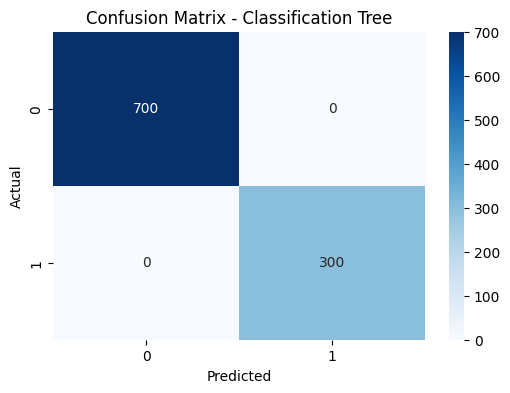

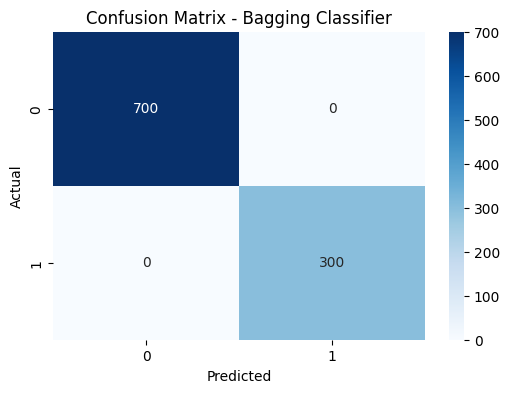

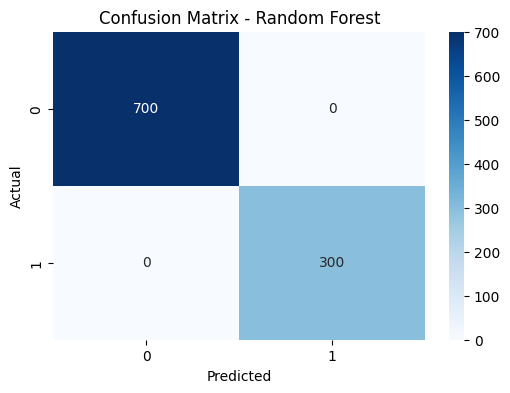

                 Model  Accuracy  Precision  Recall  FPR  TPR
0  Classification Tree       1.0        1.0     1.0  0.0  1.0
1   Bagging Classifier       1.0        1.0     1.0  0.0  1.0
2        Random Forest       1.0        1.0     1.0  0.0  1.0


In [18]:
# 2. (a) Fit Classification Tree, Bagging, and Random Forest Models
######################################

# 1. Classification Tree
tree_clf = DecisionTreeClassifier(criterion='gini',random_state=42)
tree_clf.fit(X_scaled_df, y)
y_pred_tree = tree_clf.predict(X_scaled_df)
accuracy_tree = accuracy_score(y, y_pred_tree)

# 2. Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(criterion='gini', random_state=42),
    n_estimators=100, 
    random_state=42
)
bagging_clf.fit(X_scaled_df, y)
y_pred_bagging = bagging_clf.predict(X_scaled_df)
accuracy_bagging = accuracy_score(y, y_pred_bagging)

# 3. Random Forest
rf_clf = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=42)

rf_clf.fit(X_scaled_df, y)
y_pred_rf = rf_clf.predict(X_scaled_df)
accuracy_rf = accuracy_score(y, y_pred_rf)



# Function to calculate evaluation metrics
def calculate_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    Recall = TPR  # Recall is the same as TPR
    return {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'FPR': FPR, 'TPR': TPR}

# Confusion matrices for the three models
conf_matrix_tree = confusion_matrix(y, y_pred_tree)
conf_matrix_bagging = confusion_matrix(y, y_pred_bagging)
conf_matrix_rf = confusion_matrix(y, y_pred_rf)
# Confusion Matrix for Classification Tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Classification Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for Bagging Classifier
conf_matrix_bagging = confusion_matrix(y, y_pred_bagging)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Calculate metrics for each model
metrics_tree = calculate_metrics(conf_matrix_tree)
metrics_bagging = calculate_metrics(conf_matrix_bagging)
metrics_rf = calculate_metrics(conf_matrix_rf)
# Combine metrics into a DataFrame for better comparison
metrics_df = pd.DataFrame({
    'Model': ['Classification Tree', 'Bagging Classifier', 'Random Forest'],
    'Accuracy': [metrics_tree['Accuracy'], metrics_bagging['Accuracy'], metrics_rf['Accuracy']],
    'Precision': [metrics_tree['Precision'], metrics_bagging['Precision'], metrics_rf['Precision']],
    'Recall': [metrics_tree['Recall'], metrics_bagging['Recall'], metrics_rf['Recall']],
    'FPR': [metrics_tree['FPR'], metrics_bagging['FPR'], metrics_rf['FPR']],
    'TPR': [metrics_tree['TPR'], metrics_bagging['TPR'], metrics_rf['TPR']]
})

# Display the DataFrame with the comparison metrics
print(metrics_df)



In [ ]:
# Print accuracies on the entire dataset
print(f"Accuracy (Classification Tree): {accuracy_tree:.4f}")
print(f"Accuracy (Bagging Classifier): {accuracy_bagging:.4f}")
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
plt.figure(figsize=(200,100)) 
plot_tree(tree_clf, feature_names=X.columns, filled=True, class_names=['Good', 'Bad'], rounded=True)
plt.show()


Accuracy (Classification Tree): 1.0000
Accuracy (Bagging Classifier): 1.0000
Accuracy (Random Forest): 1.0000


In [7]:
# Comment: These metrics are likely overestimated since the models are evaluated on the same data they were trained on.

######################################
# 2. (b) Split the Dataset and Evaluate the Models on Training/Test Sets
######################################

# Split the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# 1. Classification Tree on Training Data

tree_clf.fit(X_train, y_train)
y_pred_tree_test = tree_clf.predict(X_test)
accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)

# 2. Bagging Classifier on Training Data
bagging_clf.fit(X_train, y_train)
y_pred_bagging_test = bagging_clf.predict(X_test)
accuracy_bagging_test = accuracy_score(y_test, y_pred_bagging_test)

# 3. Random Forest on Training Data
rf_clf.fit(X_train, y_train)
y_pred_rf_test = rf_clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)



In [8]:
# Print test accuracies
print(f"Test Accuracy (Classification Tree): {accuracy_tree_test:.4f}")
print(f"Test Accuracy (Bagging Classifier): {accuracy_bagging_test:.4f}")
print(f"Test Accuracy (Random Forest): {accuracy_rf_test:.4f}")

# Comment: The test set gives a better measure of performance than fitting on the entire dataset. 
# Random Forest is likely to perform the best.



Test Accuracy (Classification Tree): 0.6533
Test Accuracy (Bagging Classifier): 0.7367
Test Accuracy (Random Forest): 0.7567


                       Feature  Importance
1                       Amount    0.105386
4                          Age    0.087161
0                     Duration    0.075535
12  CheckingAccountStatus.none    0.042401
9   CheckingAccountStatus.lt.0    0.038018
..                         ...         ...
28               Purpose.Other    0.002503
57     Job.UnemployedUnskilled    0.002468
26          Purpose.Retraining    0.000962
43      Personal.Female.Single    0.000000
25            Purpose.Vacation    0.000000

[61 rows x 2 columns]


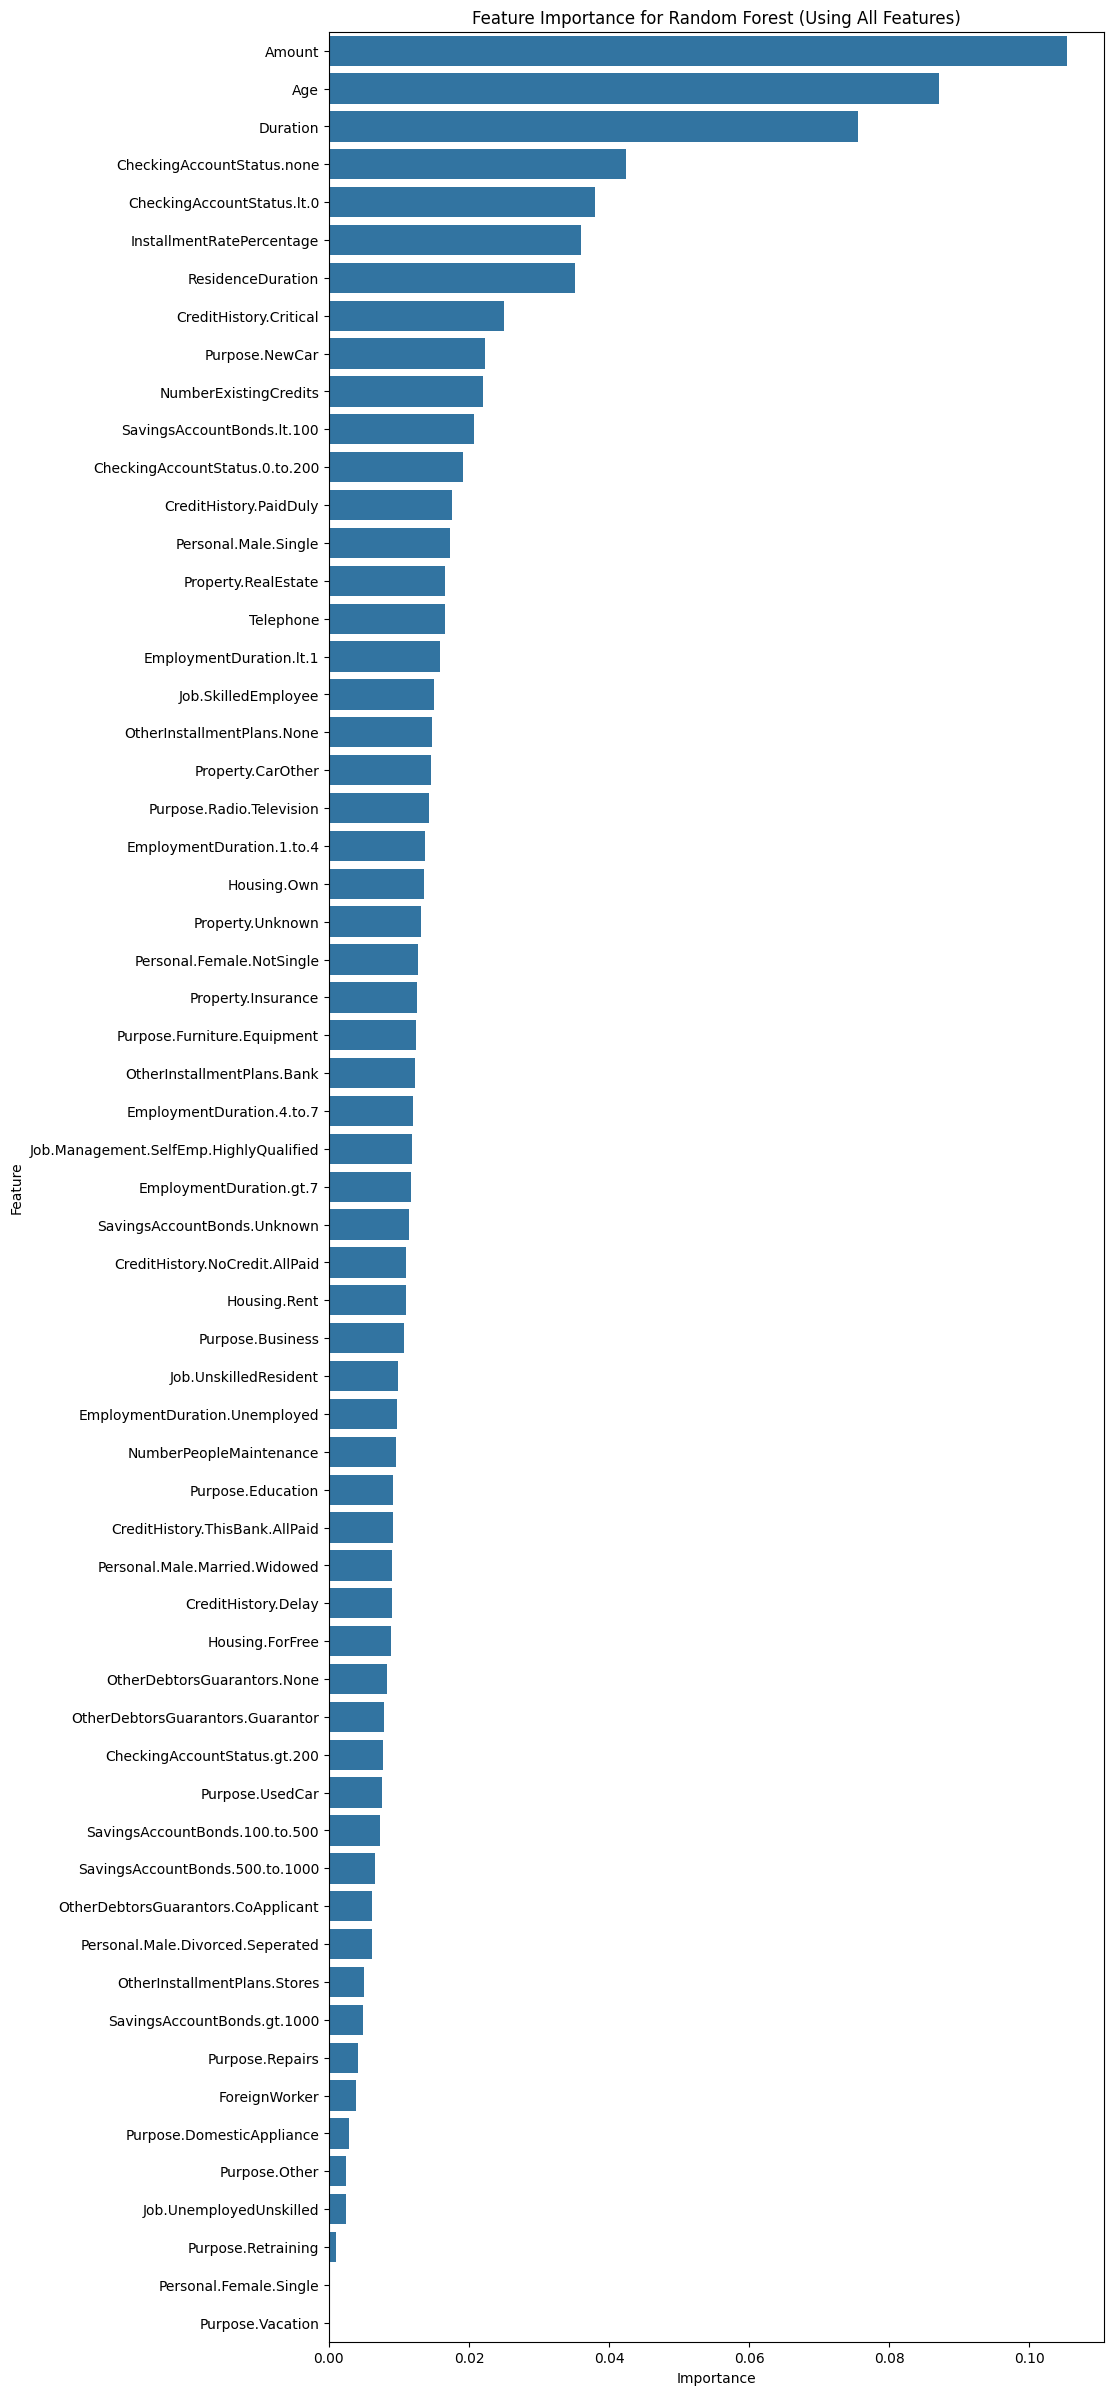

In [9]:
######################################
# 2. (c) Feature Importance for Random Forest
######################################

# Get feature importances from the Random Forest model
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot feature importances
plt.figure(figsize=(10, 30))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest (Using All Features)')
plt.show()

# The most important features will now be ranked based on their contribution to the Random Forest model.



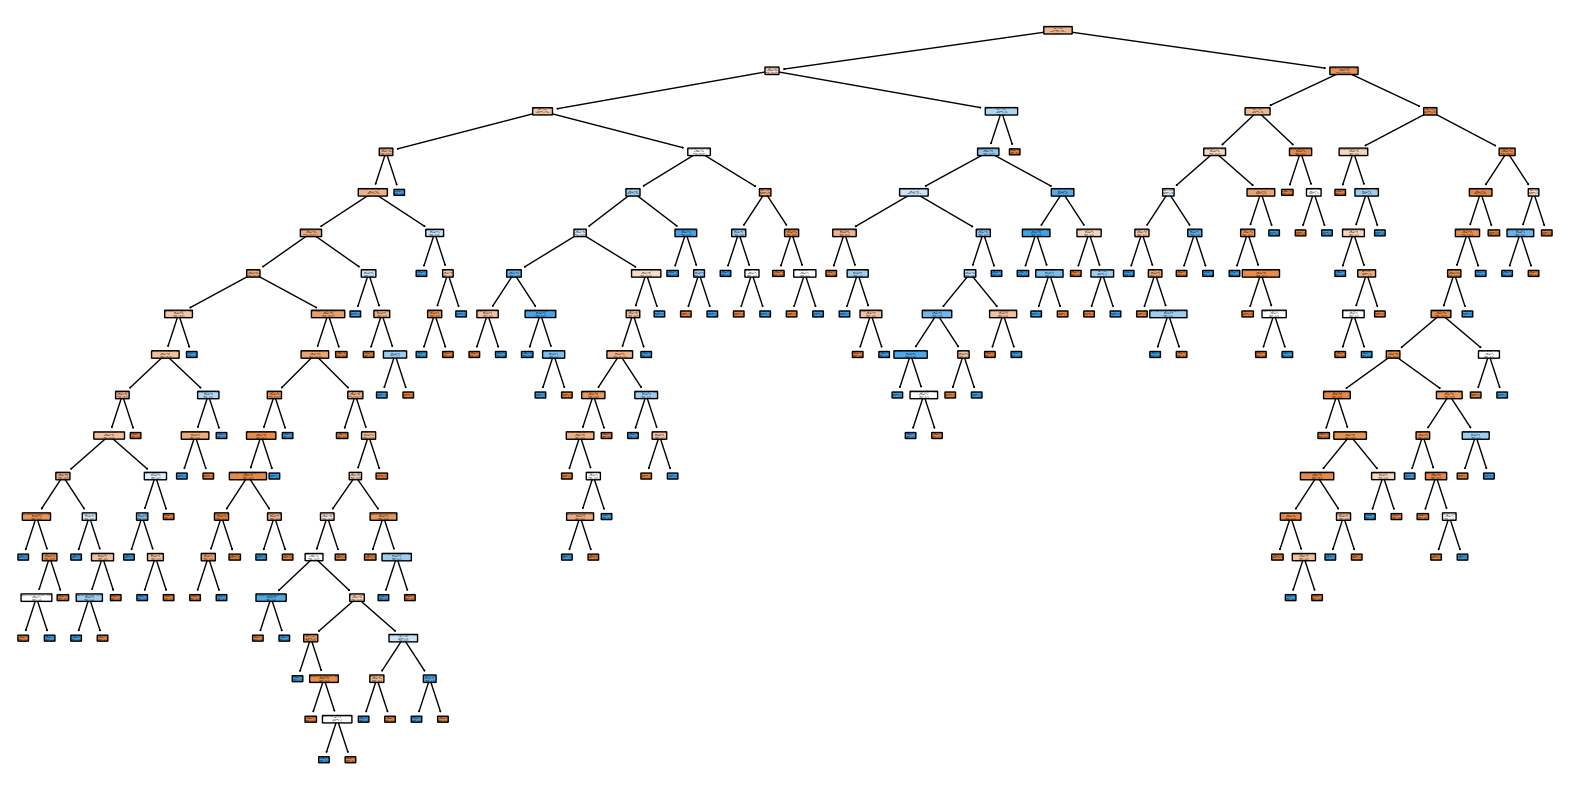

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10)) 
plot_tree(tree_clf, feature_names=X.columns, filled=True, class_names=['Good', 'Bad'], rounded=True)
plt.show()

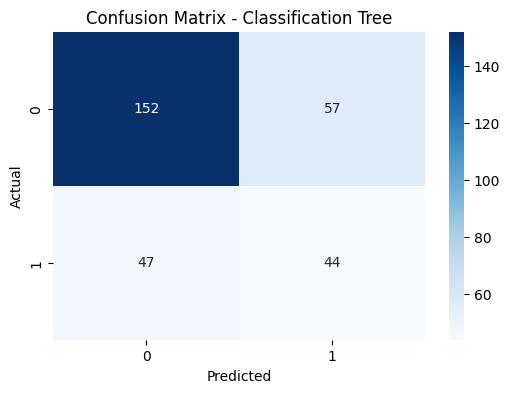

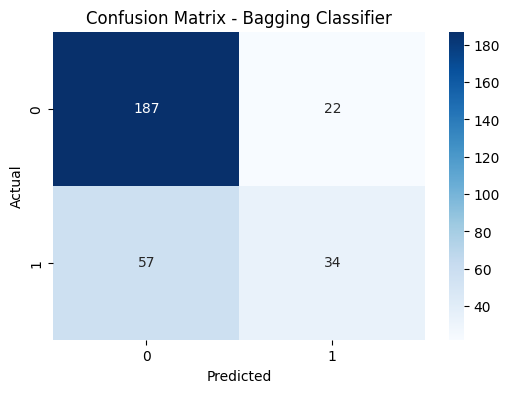

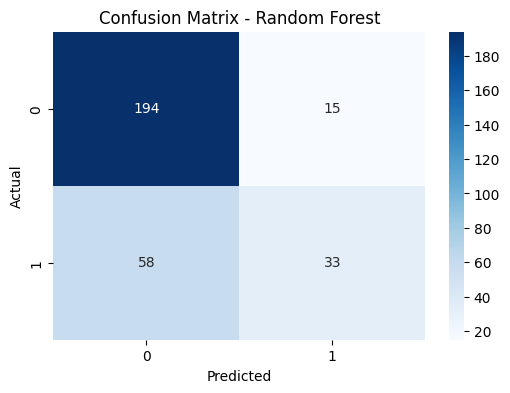

                 Model  Accuracy  Precision    Recall       FPR       TPR
0  Classification Tree  0.653333   0.435644  0.483516  0.272727  0.483516
1   Bagging Classifier  0.736667   0.607143  0.373626  0.105263  0.373626
2        Random Forest  0.756667   0.687500  0.362637  0.071770  0.362637


In [11]:
# Function to calculate evaluation metrics
def calculate_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    TPR = TP / (TP + FN)  # True Positive Rate (Recall)
    FPR = FP / (FP + TN)  # False Positive Rate
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    Accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    Recall = TPR  # Recall is the same as TPR
    return {'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall, 'FPR': FPR, 'TPR': TPR}

# Confusion matrices for the three models
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree_test)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)
# Confusion Matrix for Classification Tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Classification Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for Bagging Classifier
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Calculate metrics for each model
metrics_tree = calculate_metrics(conf_matrix_tree)
metrics_bagging = calculate_metrics(conf_matrix_bagging)
metrics_rf = calculate_metrics(conf_matrix_rf)
# Combine metrics into a DataFrame for better comparison
metrics_df = pd.DataFrame({
    'Model': ['Classification Tree', 'Bagging Classifier', 'Random Forest'],
    'Accuracy': [metrics_tree['Accuracy'], metrics_bagging['Accuracy'], metrics_rf['Accuracy']],
    'Precision': [metrics_tree['Precision'], metrics_bagging['Precision'], metrics_rf['Precision']],
    'Recall': [metrics_tree['Recall'], metrics_bagging['Recall'], metrics_rf['Recall']],
    'FPR': [metrics_tree['FPR'], metrics_bagging['FPR'], metrics_rf['FPR']],
    'TPR': [metrics_tree['TPR'], metrics_bagging['TPR'], metrics_rf['TPR']]
})

# Display the DataFrame with the comparison metrics
print(metrics_df)

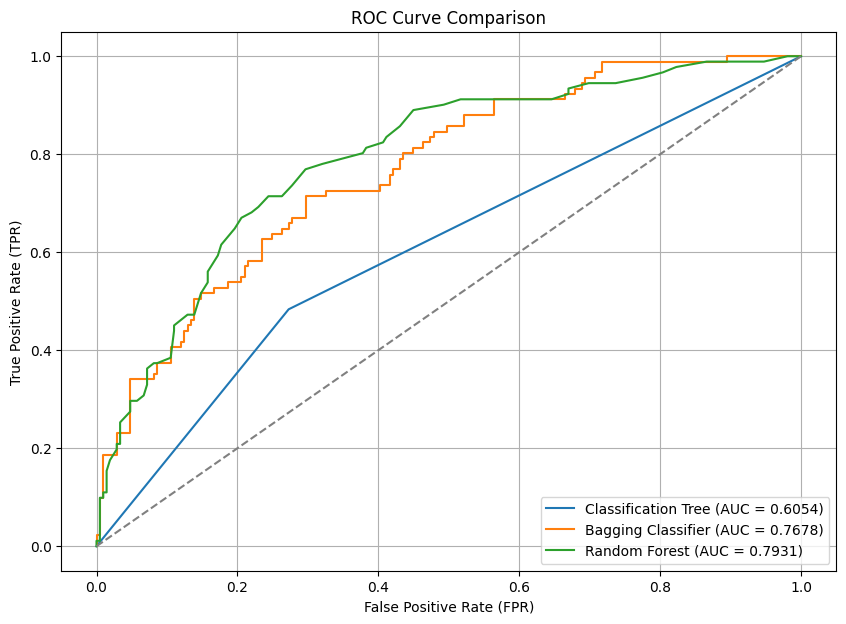

Classification Tree AUC: 0.6054
Bagging Classifier AUC: 0.7678
Random Forest AUC: 0.7931


In [12]:

# Function to plot the ROC curve
def plot_roc_curve(model_name, y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.4f})')

# Plot ROC curves for all models
plt.figure(figsize=(10, 7))

# 1. Classification Tree ROC curve
y_pred_tree_prob = tree_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
plot_roc_curve('Classification Tree', y_test, y_pred_tree_prob)

# 2. Bagging Classifier ROC curve
y_pred_bagging_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
plot_roc_curve('Bagging Classifier', y_test, y_pred_bagging_prob)

# 3. Random Forest ROC curve
y_pred_rf_prob = rf_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
plot_roc_curve('Random Forest', y_test, y_pred_rf_prob)

# Plotting additional details
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guessing
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate and print the AUC scores
auc_tree = roc_auc_score(y_test, y_pred_tree_prob)
auc_bagging = roc_auc_score(y_test, y_pred_bagging_prob)
auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

print(f"Classification Tree AUC: {auc_tree:.4f}")
print(f"Bagging Classifier AUC: {auc_bagging:.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")